In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('baseball.csv')

data.shape


(30, 17)

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.describe


<bound method NDFrame.describe of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278 

In [5]:
data.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

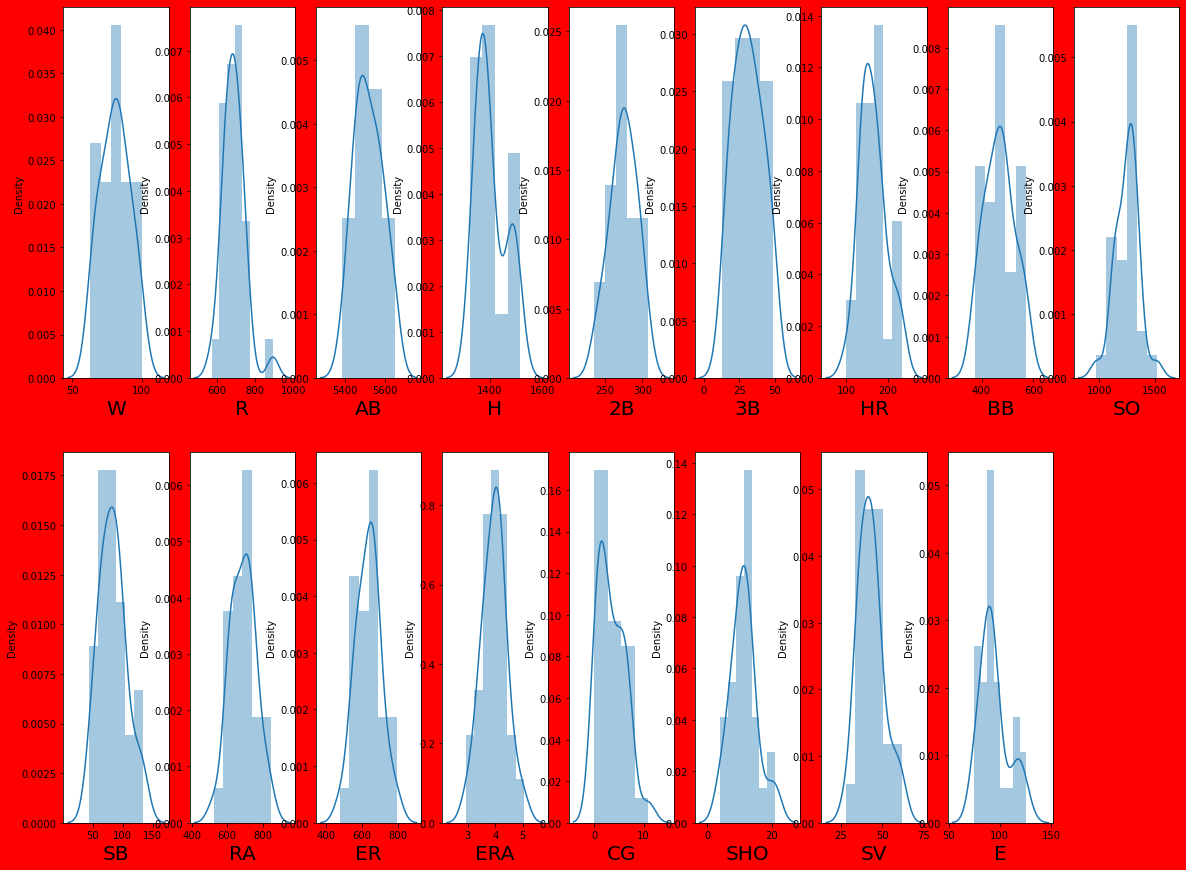

In [6]:
plt.figure(figsize=(20,15), facecolor='red')		
plotnumber=1		
		
for column in data:		
	if plotnumber<=17:	
		ax=plt.subplot(2,9,plotnumber)
		sns.distplot(data[column])
		plt.xlabel(column,fontsize=20)
		
	plotnumber+=1	
plt.show()		



In [7]:
y=data['W']

In [8]:
X=data.drop(columns=['W'])

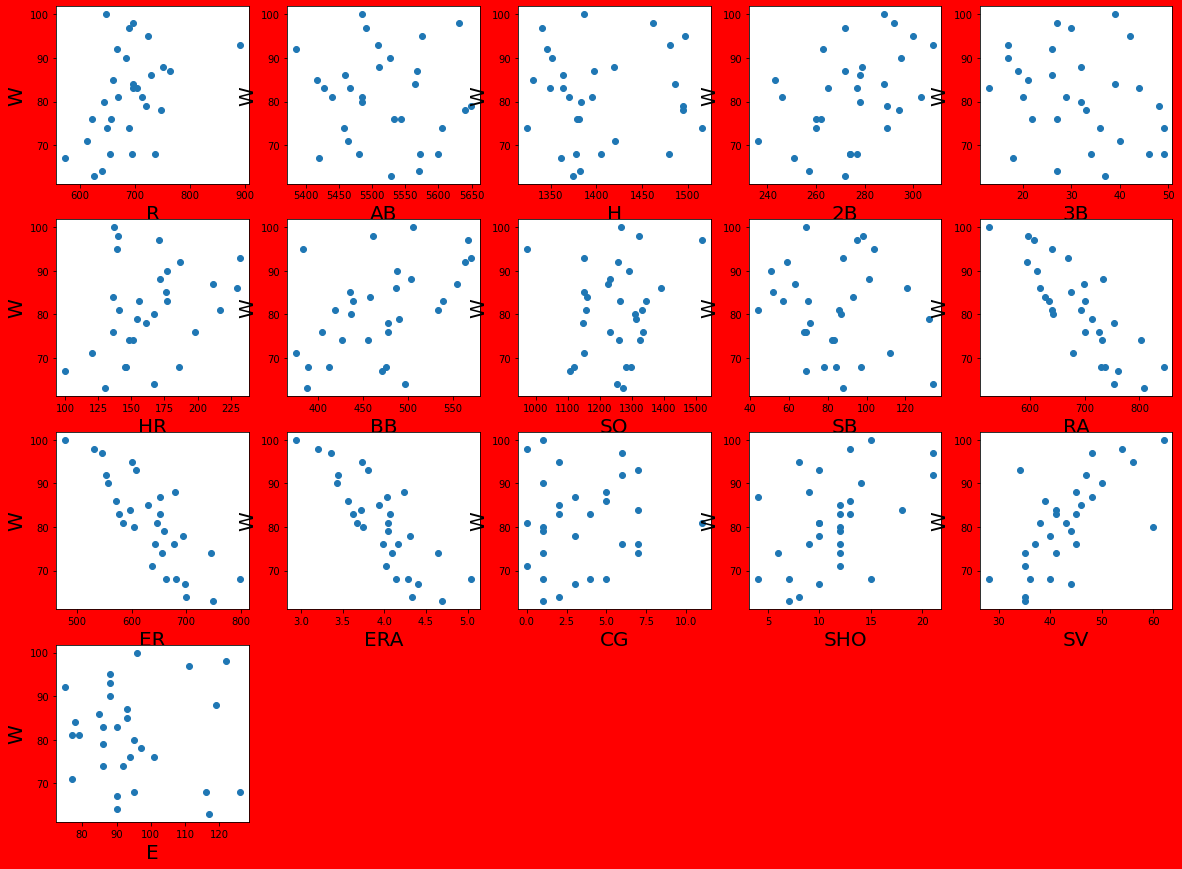

In [9]:
plt.figure(figsize=(20,15), facecolor='red')		
plotnumber=1		
		
for column in X:		
	if plotnumber<=17:	
		ax=plt.subplot(4,5,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('W',fontsize=20)
		
	plotnumber+=1	
plt.show()		


In [10]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
X_Scaled


array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y, test_size=0.25, random_state=333)
y_train.head()


18    68
11    86
26    84
10    88
20    90
Name: W, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
regression=LinearRegression()
regression.fit(x_train, y_train)

data.tail(2)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [15]:
print('chance of Winning is:', regression.predict(scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))


chance of Winning is: [75.02863382]


In [16]:
regression.score(x_test, y_test)

0.0853747008960768

In [17]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

lassocv=LassoCV(alphas=None, max_iter=10)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_test, y_test)


0.7670391268724008

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [64]:
def metric_score(clf, x_train,x_test, y_train, y_test, train=True):		
	if train:	
		y_pred=clf.predict(x_train)
		print(f"accuracy score: {accuracy_score(y_train, y_pred) *100:.2f}%")
		
	elif not train:	
		pred=clf.predict(x_test)
		print(f"accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
		print('classification report', classification_report(y_test, pred, digits=2))


In [65]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)



KNeighborsClassifier()

In [91]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

accuracy score: 31.82%


In [92]:
print('chance of Winning is:',knn.predict(scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

chance of Winning is: [63]


In [93]:
knn.predict(x_test)

array([76, 78, 76, 76, 68, 76, 68, 80], dtype=int64)

In [94]:
x_test[1]

array([ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
       -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
       -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
       -0.46146963])